<font size = "6" color = "Blue"> HOUSE PRICE PREDICTION </font>

## Introduction 

House price prediction is a classic machine learning project that aims to estimate the value of a house based on its features. These features can include location, size, number of bedrooms and bathrooms, age, and various other attributes. This project demonstrates the application of several machine learning models to analyze and predict house prices with reasonable accuracy. Accurate house price prediction is valuable for both buyers and sellers, as well as for real estate market analysis.


##  Data Preprocessing 
- Data preprocessing is a crucial step in any machine learning project. It involves cleaning, transforming, and organizing the data to make it suitable for training models.

## Features 

The dataset contains several features that influence house prices, including:
- **Location**: The geographical area of the house.
- **Size**: Square footage or number of bedrooms/bathrooms.
- **Age of Property**: The year the house was built.
- **bedrooms**: No.of available bedrooms in the house.
- **Water Availability**: No.of resources for availability of water
- **Other Attributes**: Additional factors such as  floors, etc.


## Graphs & Visualizations
- **Bar Plot**: A bar plot is used to visualize the grade's of prices based on the house price.
- **Predicted vs Actual Prices**: A Scatter plot and Bar plot used to compare predicted and actual prices.

<font size = "5" color = "green">  Working of the Model </font>


### 1. Importing neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Define the path of Dataset

In [3]:
cell_df = pd.read_csv("process data.csv")
warnings.filterwarnings("ignore")
cell_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,06-05-2014 00:00,7800,2,1,780,16344,1,1,1,1,780,0,1942,0,4229 S 144th St,Tukwila,WA 98168,USA
1,23-05-2014 00:00,80000,1,0,430,5050,1,1,1,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA
2,29-05-2014 00:00,83000,2,1,900,8580,1,1,1,3,900,0,1918,0,14440 51st Ave S,Tukwila,WA 98168,USA
3,20-05-2014 00:00,83300,3,2,1490,7770,1,1,1,4,1490,0,1990,0,26017 189th Ave SE,Covington,WA 98042,USA
4,23-05-2014 00:00,83300,3,2,1370,78408,1,1,1,5,1370,0,1964,0,24007 196th Ave SE,Covington,WA 98042,USA


### 3. Check the Datatypes

In [4]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4551 non-null   object
 1   price          4551 non-null   int64 
 2   bedrooms       4551 non-null   int64 
 3   bathrooms      4551 non-null   int64 
 4   sqft_living    4551 non-null   int64 
 5   sqft_lot       4551 non-null   int64 
 6   floors         4551 non-null   int64 
 7   waterfront     4551 non-null   int64 
 8   view           4551 non-null   int64 
 9   condition      4551 non-null   int64 
 10  sqft_above     4551 non-null   int64 
 11  sqft_basement  4551 non-null   int64 
 12  yr_built       4551 non-null   int64 
 13  yr_renovated   4551 non-null   int64 
 14  street         4551 non-null   object
 15  city           4551 non-null   object
 16  statezip       4551 non-null   object
 17  country        4551 non-null   object
dtypes: int64(13), object(5)
memo

In [5]:
label_encoders = {}
for column in ['city']:
    label_encoders[column] = LabelEncoder()
    cell_df[column] = label_encoders[column].fit_transform(cell_df[column])
for column in ['street']:
    label_encoders[column] = LabelEncoder()
    cell_df[column] = label_encoders[column].fit_transform(cell_df[column])
for column in ['statezip']:
    label_encoders[column] = LabelEncoder()
    cell_df[column] = label_encoders[column].fit_transform(cell_df[column])

In [6]:
cell_df['price'] = cell_df['price'].astype('int')
cell_df['bedrooms'] = cell_df['bedrooms'].astype('int')
cell_df['bathrooms'] = cell_df['bathrooms'].astype('int')

In [7]:
f_df = cell_df[['yr_built','sqft_above', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition','street','statezip','city', 'floors']]
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yr_built     4551 non-null   int64
 1   sqft_above   4551 non-null   int64
 2   sqft_living  4551 non-null   int64
 3   sqft_lot     4551 non-null   int64
 4   bedrooms     4551 non-null   int64
 5   bathrooms    4551 non-null   int64
 6   waterfront   4551 non-null   int64
 7   view         4551 non-null   int64
 8   condition    4551 non-null   int64
 9   street       4551 non-null   int64
 10  statezip     4551 non-null   int64
 11  city         4551 non-null   int64
 12  floors       4551 non-null   int64
dtypes: int64(13)
memory usage: 462.3 KB


In [8]:
n = np.array(cell_df['price'])
labels = []
for i in range(len(n)):
    if n[i] > 1000000:
        labels.append(1)
    elif n[i] > 500000:
        labels.append(2)
    else:
        labels.append(3)
f_df['price_category'] = labels

### 4. Creating the Sub plot

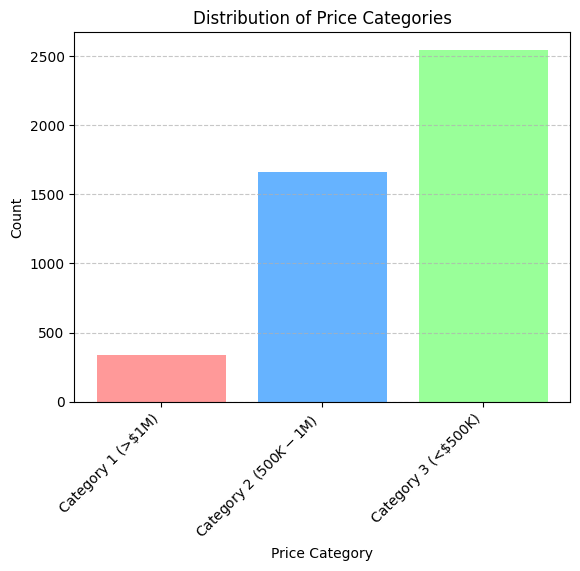

In [9]:
plt.subplot(1, 1, 1)
category_colors = ['#ff9999', '#66b3ff', '#99ff99']
category_labels = ['Category 1 (>$1M)', 'Category 2 ($500K-$1M)', 'Category 3 (<$500K)']
category_counts = pd.Series(f_df['price_category']).value_counts().sort_index()
plt.bar(category_counts.index, category_counts.values, color=category_colors)
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks([1, 2, 3], category_labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

### 5. Splitting the Dataset

In [10]:
X = np.array(f_df[['yr_built','sqft_above', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition','street','statezip','city', 'floors']])
y = np.array(f_df['price_category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Using KNN Classification

In [11]:
#KNN-C

classifier = KNeighborsClassifier(n_neighbors=21)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

print("KNN Classification Report: ")
print(classification_report(y_test, y_predict))

KNN Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.43      0.54        74
           2       0.63      0.61      0.62       317
           3       0.79      0.85      0.82       520

    accuracy                           0.73       911
   macro avg       0.71      0.63      0.66       911
weighted avg       0.73      0.73      0.73       911



### 7. Using Random Forest Classification

In [12]:
#RF-C

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.814489571899012


### 8. Using KNN Regression

In [13]:
#KNN-R

new_data = [[2010, 2180, 2370, 1580, 5, 3, 0, 0, 4,27, 60, 40, 2]] 
#new_data = [[1992, 1180, 1580, 2080 3, 2, 0, 0, 4,30, 46, 7, 3]]

new_data_scaled = scaler.transform(new_data)
prediction_knn = classifier.predict(new_data_scaled)  # Fixed line
print(f"Predicted Price Category is (KNN-R): {prediction_knn[0]}")

Predicted Price Category is (KNN-R): 2


### 9. Using Decision Tree Classification

In [17]:
#DT-C

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (DT-C):", accuracy)

Accuracy (DT-C): 0.7464324917672887


### 10. Using Decision Tree Regression

In [18]:
#DT-R

new_data = [[2010, 2180, 2370, 1580, 5, 3, 0, 0, 4,27, 60, 40, 2]] 
#new_data = [[1992, 1180, 1580, 2080 3, 2, 0, 0, 4,30, 46, 7, 3]]

new_data = scaler.transform(new_data)
prediction = clf.predict(new_data)
print(f'The New data House price is Catogery (DT_R): {prediction}')

The New data House price is Catogery (DT_R): [3]


### 11. Using SVM Classification

In [19]:
#SVM-C

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Linear SVM Accuracy : {accuracy}')

Linear SVM Accuracy : 0.7420417124039517


### 12. Using SVM Regression

In [20]:
#SVM-R

new_data = [[2010, 2180, 2370, 1580, 5, 3, 0, 0, 4,27, 60, 40, 2]] 
#new_data = [[1992, 1180, 1580, 2080 3, 2, 0, 0, 4,30, 46, 7, 3]]

new_data = scaler.transform(new_data)
prediction = clf.predict(new_data)
print(f'Predicted Price Category (Linear SVM): {int(prediction[0])}')

gamma = 0.1
clsf = svm.SVC(kernel='rbf', gamma=gamma)
clsf.fit(X_train_scaled, y_train)
y_pred_rbf = clsf.predict(X_test_scaled)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF SVM Accuracy (gamma={gamma}): {accuracy_rbf}')

prediction_rbf = clsf.predict(new_data)
print(f'Predicted Price Category (RBF SVM): {int(prediction_rbf[0])}')

Predicted Price Category (Linear SVM): 3
RBF SVM Accuracy (gamma=0.1): 0.747530186608123
Predicted Price Category (RBF SVM): 2


### 13. Using Random Forest Regression to find the Price

In [21]:
#RF-R

X = np.array(f_df[['yr_built','sqft_above', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition','street','statezip','city', 'floors']])
y = np.array(cell_df[['price']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

new_data = [[2010, 2180, 2370, 1580, 5, 3, 0, 0, 4,27, 60, 40, 2]] 
#new_data = [[1992, 1180, 1580, 2080 3, 2, 0, 0, 4,30, 46, 7, 3]]

prediction = rf_regressor.predict(new_data)
print(f'The New data House price prediction is (RF-R): {int(prediction[0])}')

The New data House price prediction is (RF-R): 803938


### 14. Using Ridge and Lasso Regressions 

In [22]:
#RIDGE & LASSO

ridge = Ridge(alpha=1) 
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=1) 
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Mean Squared Error of Ridge Regression:", int(ridge_mse))
print("Mean Squared Error of Lasso Regression:", int(lasso_mse))

Mean Squared Error of Ridge Regression: 838905172797
Mean Squared Error of Lasso Regression: 838729431881


### 15. Actual price VS Actual Prices Scatter Plot

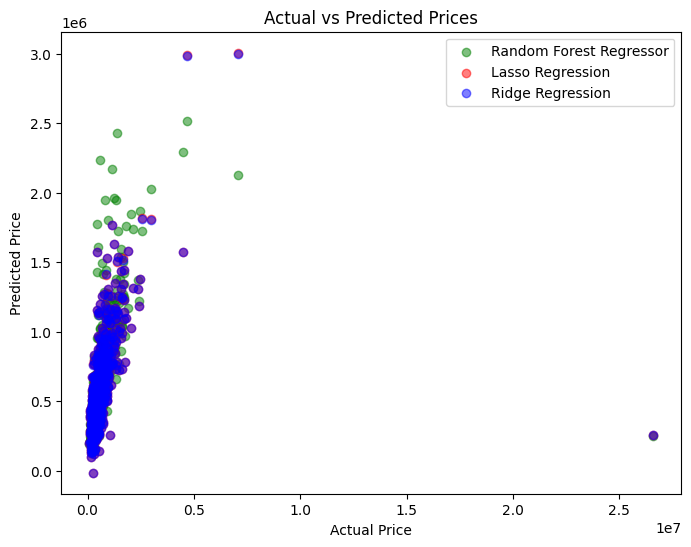

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label="Random Forest Regressor")
plt.scatter(y_test, lasso_pred, color='red', alpha=0.5, label="Lasso Regression")
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.5, label="Ridge Regression")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

### 16. Actual price VS Actual Prices Bar Plot

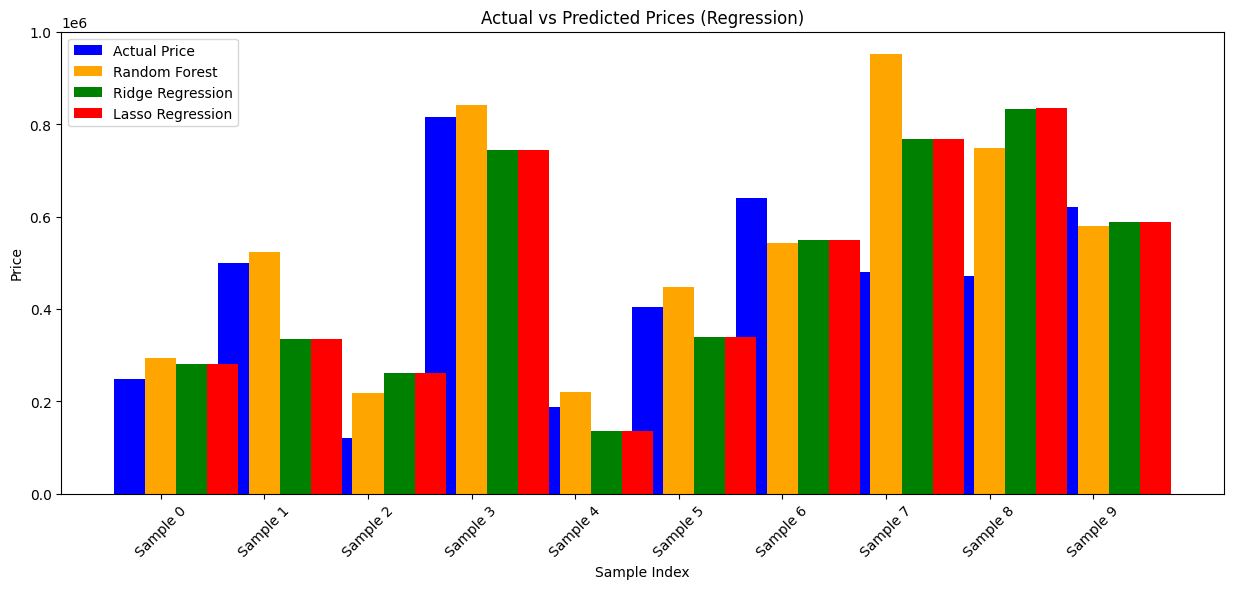

In [24]:
y_test_flat = np.ravel(y_test)
y_pred_rf_flat = np.ravel(y_pred_rf)
ridge_pred_flat = np.ravel(ridge_pred)
lasso_pred_flat = np.ravel(lasso_pred)

plt.figure(figsize=(15, 6))
x = np.arange(len(y_test_flat[:10]))
width = 0.3

plt.bar(x - width, y_test_flat[:10], width=width, label="Actual Price", color='blue')
plt.bar(x, y_pred_rf_flat[:10], width=width, label="Random Forest", color='orange')
plt.bar(x + width, ridge_pred_flat[:10], width=width, label="Ridge Regression", color='green')
plt.bar(x + 2*width, lasso_pred_flat[:10], width=width, label="Lasso Regression", color='red')

plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Regression)")
plt.xticks(x, labels=[f"Sample {i}" for i in range(10)], rotation=45)
plt.legend()
plt.show()

## Conclusion
This project explores various machine learning models for house price prediction, analyzing their performance using error metrics and visualizations. 
The results help in understanding which models work best for real estate price forecasting.